<IPython.core.display.Javascript object>


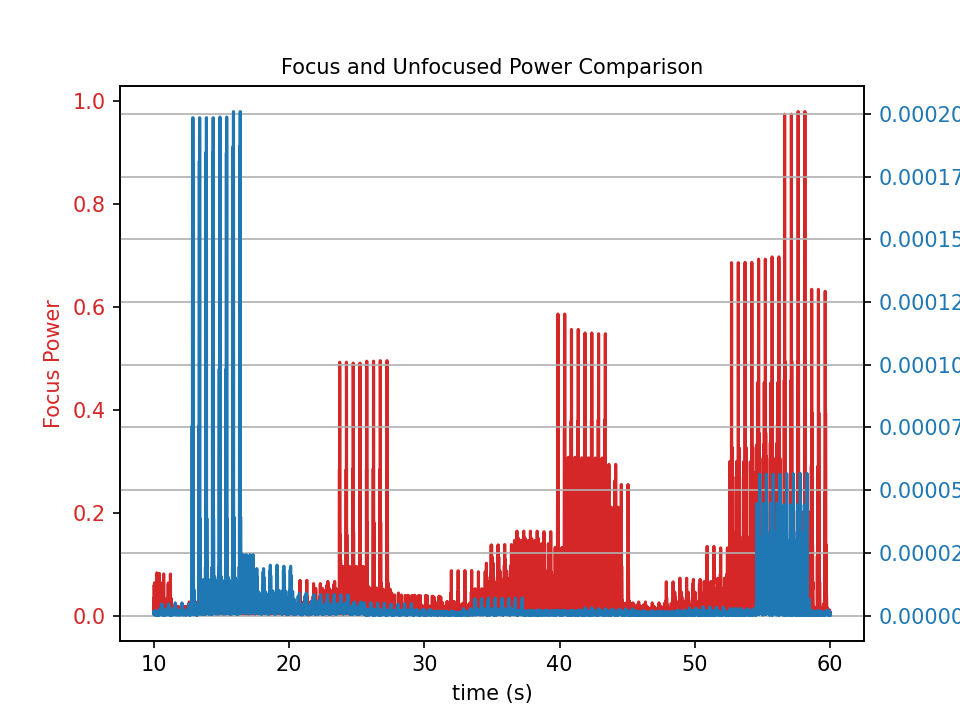

In [90]:
class Process():
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    import matplotlib.pyplot as plt
    def __init__(self):
        # constants
        # fidget = distracted
        path1 = "trial1.csv" 
        path2 = "trial2.csv"
        path3 = "focus2.csv"
        path4 = "fidget2.csv"
        path5 = "focus3.csv"
        path6 = "fidget3.csv"
        path7 = "focus4.csv"
        path8 = "fidget4.csv"
        path9 = "focus5.csv"
        path10 = "fidget5.csv"
            
        # import data
        df1 = pd.read_csv(path9)
        df2 = pd.read_csv(path10)
        cols = ['time','sample','data','eventID','eventDate','eventDuration']
        dropme = ['eventDate','eventDuration','sample']
        
        df1.columns = cols 
        df2.columns = cols 
        df1 = df1.drop(columns = dropme);
        df2 = df2.drop(columns = dropme);
        
        scaler = MinMaxScaler()
        scaler.fit(df1['data'].values.reshape(-1,1))
        df1.data = scaler.transform(df1['data'].values.reshape(-1,1))
        
        scaler2 = MinMaxScaler()
        scaler2.fit(df2['data'].values.reshape(-1,1))
        df2.data = scaler2.transform(df2['data'].values.reshape(-1,1))
        
        # save files 
        self.df1 = df1
        self.df2 = df2
        
        
    def plot(self):
        %matplotlib notebook
        fs = 250; 
        time_window = 60
        idx = fs*time_window
        N = np.linspace(10, 60, num=fs*50) 
        title = "Normalized Power Over time"
        
        Yfocus = self.df1.data[10*fs:idx].values.reshape(-1,1)
        Yfidget = self.df2.data[10*fs:idx].values.reshape(-1,1)
        
       # Create some mock data
        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('Focus Power', color=color)
        ax1.plot(N, Yfocus, color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel('Distracted Power', color=color)  # we already handled the x-label with ax1
        ax2.plot(N, Yfidget, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        #fig.tight_layout()  # otherwise the right y-label is slightly clipped
        
        plt.grid(True)
        plt.title("Focus and Distracted Power Comparison", fontsize = 10)
        bbox_inches='tight'
        plt.show()
        plt.savefig('output.png',bbox_inches='tight')

            
    def main(self):
        self.__init__()
        self.plot()
if __name__ == "__main__":
    Process().main()